In [1]:
import pandas as pd
from plotnine import *
from plotnine.themes import theme
from plotnine.facets import facet_wrap
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
Happy=pd.read_csv("../Data/Happiness.csv")
Happy.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


### 1.1 Region 별 개수를 구하시오
### 1.2 Region 별 개수를 구하고 내림차순으로 정렬하시오.

In [3]:
a=pd.DataFrame(Happy[['Region']].value_counts())
a

,0
Region,
Sub-Saharan Africa,117
Central and Eastern Europe,87
Latin America and Caribbean,68
Western Europe,63
Middle East and Northern Africa,58
Southeastern Asia,26
Southern Asia,21
Eastern Asia,16
Australia and New Zealand,6


### 1.3 Region별 정부 평균신뢰도를 구하고 가장작은 3곳을 출력하시오

In [4]:
b=Happy.groupby('Region').mean()[['Trust']]
b

,Trust
Region,
Australia and New Zealand,0.368657
Central and Eastern Europe,0.084788
Eastern Asia,0.109937
Latin America and Caribbean,0.103720
Middle East and Northern Africa,0.164408
North America,0.228908
Southeastern Asia,0.142890
Southern Asia,0.103500
Sub-Saharan Africa,0.114975


In [5]:
b.sort_values(by=['Trust'], axis=0).head(5)

,Trust
Region,
Central and Eastern Europe,0.084788
Southern Asia,0.103500
Latin America and Caribbean,0.103720
Eastern Asia,0.109937
Sub-Saharan Africa,0.114975


In [6]:
b.rename(columns={'Trust':'Mean_Trust'}).head(3)

,Mean_Trust
Region,
Australia and New Zealand,0.368657
Central and Eastern Europe,0.084788
Eastern Asia,0.109937


### 1.4 South Korea의 2016년 행복지수와 순위를 구하시오.

In [7]:
c=Happy[['Country','H_Rank','H_Score']]
c

,Country,H_Rank,H_Score
0,Switzerland,1,7.587
1,Iceland,2,7.561
2,Denmark,3,7.527
3,Norway,4,7.522
4,Canada,5,7.427
...,...,...,...
463,Rwanda,151,3.471
464,Syria,152,3.462
465,Tanzania,153,3.349
466,Burundi,154,2.905


In [8]:
c[215:216]

,Country,H_Rank,H_Score
215,South Korea,57,5.835


In [9]:
d=c.loc[[215],['Country','H_Rank','H_Score']]
d

,Country,H_Rank,H_Score
215,South Korea,57,5.835


In [10]:
grouped = d['H_Score'].groupby(d['Country'])
e=pd.DataFrame(grouped.sum())
e.sort_values(by=['H_Score'], axis=0, ascending=False).head(5)

,H_Score
Country,
South Korea,5.835


### 1.5 Country별 3개년 H_Score 합산 상위 5개국을 출력하시오

In [11]:
Happy.groupby("Country").sum()["H_Score"].sort_values(ascending=False).head()

Country
Switzerland    22.590
Denmark        22.575
Iceland        22.566
Norway         22.557
Finland        22.288
Name: H_Score, dtype: float64

### 1.6. 2015년에 비해 행복지수 순위가 가장 높아진 국가 상위5개를 출력하시오

In [12]:
Happy['year'].value_counts()

2015    158
2016    157
2017    153
Name: year, dtype: int64

In [14]:
Happy_2015=Happy[Happy["year"]== 2015][["Country","H_Rank"]]
Happy_2015

,Country,H_Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
...,...,...
153,Rwanda,154
154,Benin,155
155,Syria,156
156,Burundi,157


In [15]:
Happy_2016=Happy[Happy["year"]== 2016][["Country","H_Rank"]]
Happy_2016

,Country,H_Rank
158,Denmark,1
159,Switzerland,2
160,Iceland,3
161,Norway,4
162,Finland,5
...,...,...
310,Benin,153
311,Afghanistan,154
312,Togo,155
313,Syria,156


In [16]:
Happy_2017=Happy[Happy["year"]== 2017][["Country","H_Rank"]]
Happy_2017

,Country,H_Rank
315,Norway,1
316,Denmark,2
317,Iceland,3
318,Switzerland,4
319,Finland,5
...,...,...
463,Rwanda,151
464,Syria,152
465,Tanzania,153
466,Burundi,154


In [17]:
H_1615=pd.merge(left = Happy_2015 , right = Happy_2016, how = "inner", on = "Country")
H_1615

,Country,H_Rank_x,H_Rank_y
0,Switzerland,1,2
1,Iceland,2,3
2,Denmark,3,1
3,Norway,4,4
4,Canada,5,6
...,...,...,...
146,Rwanda,154,152
147,Benin,155,153
148,Syria,156,156
149,Burundi,157,157


In [18]:
H_1715=pd.merge(left = Happy_2015 , right = Happy_2017, how = "inner", on = "Country")
H_1715

,Country,H_Rank_x,H_Rank_y
0,Switzerland,1,4
1,Iceland,2,3
2,Denmark,3,2
3,Norway,4,1
4,Canada,5,7
...,...,...,...
144,Rwanda,154,151
145,Benin,155,143
146,Syria,156,152
147,Burundi,157,154


In [19]:
H_1715["H_diff"]=H_1715["H_Rank_y"]-H_1715["H_Rank_x"]
H_1715

,Country,H_Rank_x,H_Rank_y,H_diff
0,Switzerland,1,4,3
1,Iceland,2,3,1
2,Denmark,3,2,-1
3,Norway,4,1,-3
4,Canada,5,7,2
...,...,...,...,...
144,Rwanda,154,151,-3
145,Benin,155,143,-12
146,Syria,156,152,-4
147,Burundi,157,154,-3


In [20]:
H_1615["H_diff"]=H_1615["H_Rank_y"]-H_1615["H_Rank_x"]
H_1615

,Country,H_Rank_x,H_Rank_y,H_diff
0,Switzerland,1,2,1
1,Iceland,2,3,1
2,Denmark,3,1,-2
3,Norway,4,4,0
4,Canada,5,6,1
...,...,...,...,...
146,Rwanda,154,152,-2
147,Benin,155,153,-2
148,Syria,156,156,0
149,Burundi,157,157,0


In [21]:
H_1715.sort_values(by="H_diff",ascending=True).head()

,Country,H_Rank_x,H_Rank_y,H_diff
84,Latvia,89,54,-35
126,Egypt,135,104,-31
96,Hungary,104,75,-29
125,Bulgaria,134,105,-29
81,Romania,86,57,-29


In [22]:
H_1615.sort_values(by="H_diff",ascending=True).head()

,Country,H_Rank_x,H_Rank_y,H_diff
66,Algeria,68,38,-30
87,Latvia,89,68,-21
126,Cameroon,133,114,-19
84,Romania,86,71,-15
128,Egypt,135,120,-15


### 1.7. 2015년에 비해 행복지수 순위가 가장 떨어진 국가 상위 5개를 출력하시오.

In [23]:
H_1715.sort_values(by="H_diff",ascending=False).head()

,Country,H_Rank_x,H_Rank_y,H_diff
21,Venezuela,23,82,59
91,Lesotho,97,139,42
108,Liberia,116,148,32
80,Zambia,85,116,31
111,Haiti,119,145,26


In [24]:
H_1615.sort_values(by="H_diff",ascending=False).head()

,Country,H_Rank_x,H_Rank_y,H_diff
110,Liberia,116,150,34
76,Nigeria,78,103,25
21,Venezuela,23,44,21
83,Zambia,85,106,21
73,Vietnam,75,96,21


### 1.8 year, Region 별 H_Score 평균과 분산을 구하시오

In [47]:
grouped_mean = Happy.groupby(["Region","year"]).mean()["H_Score"].head()
pd.DataFrame(grouped_mean)


H_Score
Region                     year          
Australia and New Zealand  2015  7.285000
                           2016  7.323500
                           2017  7.299000
Central and Eastern Europe 2015  5.332931
                           2016  5.370690

In [137]:
grouped_var = Happy.groupby(["Region","year"]).var()["H_Score"].head()
# Happy['"H_Score"].groupby(Happy["Region"]).head()
pd.DataFrame(grouped_var)


H_Score
Region                     year          
Australia and New Zealand  2015  0.000002
                           2016  0.000220
                           2017  0.000450
Central and Eastern Europe 2015  0.325408
                           2016  0.348567

In [91]:
all_grouped=grouped_mean
all_grouped=pd.DataFrame(all_grouped)
all_grouped

H_Score
Region                     year          
Australia and New Zealand  2015  7.285000
                           2016  7.323500
                           2017  7.299000
Central and Eastern Europe 2015  5.332931
                           2016  5.370690

In [93]:
all_grouped1=Happy.groupby(["Region","year"]).describe()["H_Score"][["mean","std"]].head()

In [95]:
all_grouped1.rename(columns={'std':'var'})

mean       var
Region                     year                    
Australia and New Zealand  2015  7.285000  0.001414
                           2016  7.323500  0.014849
                           2017  7.299000  0.021213
Central and Eastern Europe 2015  5.332931  0.570446
                           2016  5.370690  0.590395

### 1.9 2017년에 Family가 H_Score에 차지하는 비율이 가장 높은 국가 3곳

In [96]:
Happy["Family_Prop"]=Happy["Family"]/Happy["H_Score"]

In [102]:
Fam_2017=Happy[Happy["year"]==2017]

In [107]:
Fam_2017[["Country","Family","Family_Prop"]].sort_values(by="Family_Prop",ascending=False).head(3)

,Country,Family,Family_Prop
444,Ukraine,1.394538,0.340463
454,Botswana,1.221555,0.324364
451,Lesotho,1.190095,0.312525


## 문제 2. plotnine 이용하기

In [108]:
Happy = pd.read_csv("../data/Happiness.csv")
Happy.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


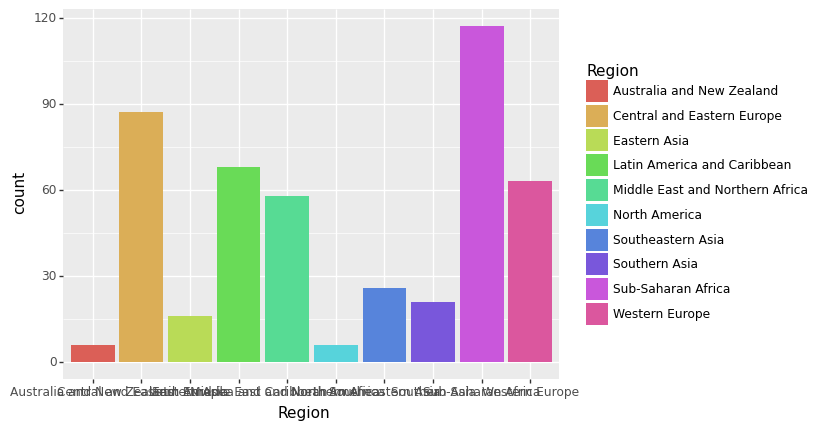

<ggplot: (152683801194)>

In [114]:
Region_bar=(ggplot(Happy,aes(x="Region", fill="Region")) + geom_bar())
Region_bar

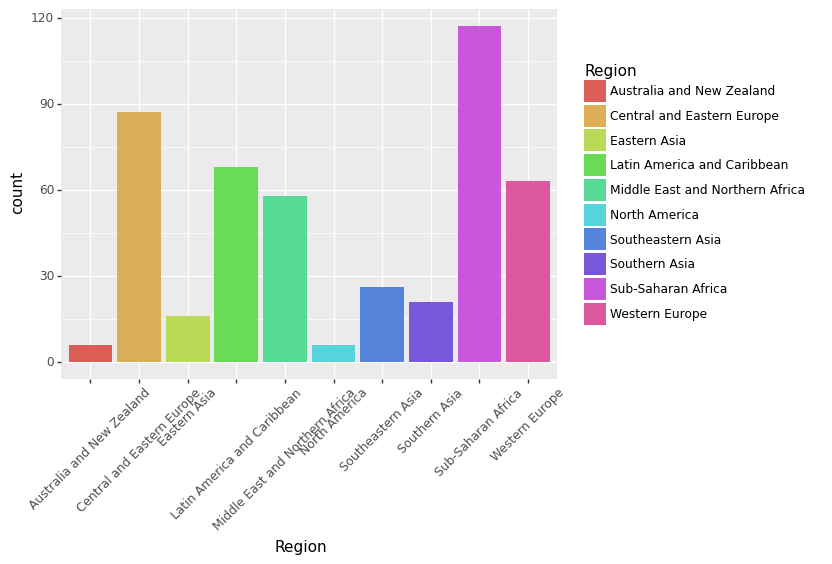

<ggplot: (152683801875)>

In [115]:
Region_bar+theme(axis_text_x=element_text(angle=45))

### 2.2 Trust(정부신뢰도) Region별 Boxplot을 그리시오.

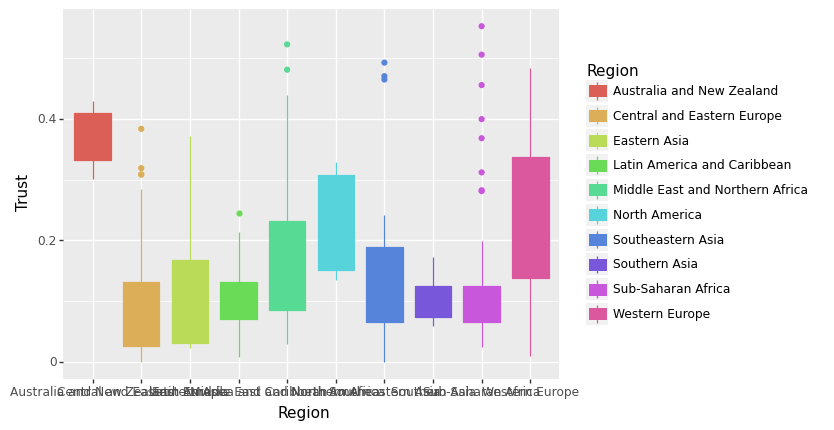

<ggplot: (152685144224)>

In [119]:
Trust_Region=(ggplot(Happy , aes("Region","Trust", fill='Region',color="Region")) + geom_boxplot())
Trust_Region

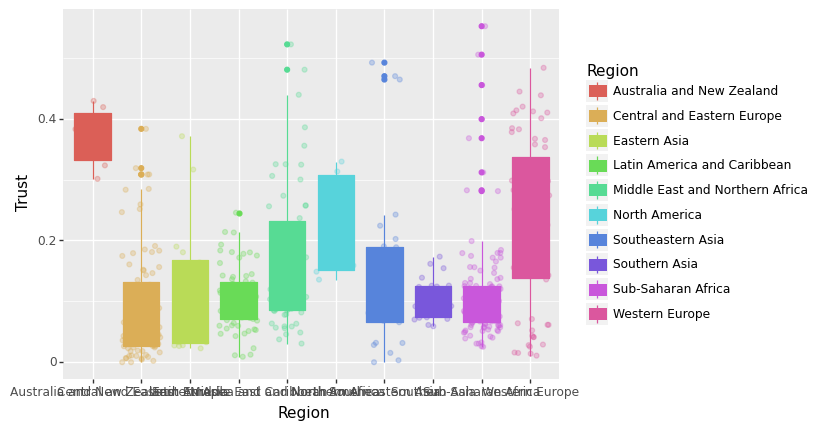

<ggplot: (152686142028)>

In [121]:
Trust_Region_1=Trust_Region+geom_jitter(alpha=0.3)
Trust_Region_1

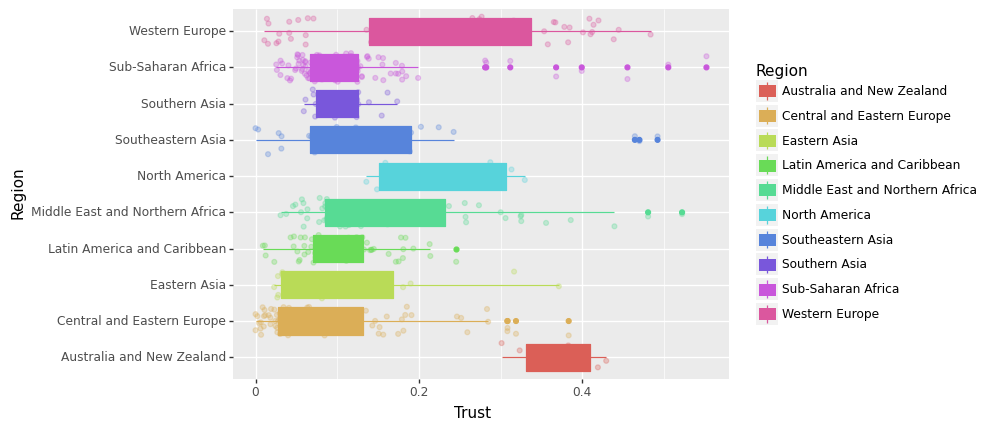

<ggplot: (152686092873)>

In [122]:
Trust_Region_1+coord_flip()

### 2.3 2017년 기준 상위 10개국에서 H_Score에 영향을 주는 요인들 비중을 그리시오.

In [133]:
Happy[Happy['year']==2017].sort_values(by='H_Rank').head(10)

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
315,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,Western Europe,0.315964,2017
316,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,Western Europe,0.400770,2017
317,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,Western Europe,0.153527,2017
318,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,Western Europe,0.367007,2017
319,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,Western Europe,0.382612,2017
320,Netherlands,2.294804,1.503945,1.428939,0.585384,0.470490,6,7.377,0.810696,Western Europe,0.282662,2017
321,Canada,2.187264,1.479204,1.481349,0.611101,0.435540,7,7.316,0.834558,North America,0.287372,2017
322,New Zealand,2.046456,1.405706,1.548195,0.614062,0.500005,8,7.314,0.816760,Australia and New Zealand,0.382817,2017
323,Sweden,2.097538,1.494387,1.478162,0.612924,0.385399,9,7.284,0.830875,Western Europe,0.384399,2017
324,Australia,2.065211,1.484415,1.510042,0.601607,0.477699,10,7.284,0.843887,Australia and New Zealand,0.301184,2017
